<a href="https://colab.research.google.com/github/dhairyaostwal/CSE4020-Codes/blob/main/KNN/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Lab CSE4020 Assessment
## Topic: Logistic Regression

Dhairya Ostwal

19BCE2199

Date: 25th Jan, 2022

## k-nearest neighbor algorithm

This algorithm is used to solve the classification model problems. K-nearest neighbor or K-NN algorithm basically creates an imaginary boundary to classify the data. When new data points come in, the algorithm will try to predict that to the nearest of the boundary line.

Therefore, larger k value means smother curves of separation resulting in less complex models. Whereas, smaller k value tends to overfit the data and resulting in complex models.

In [1]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('cancer-data-manipulated - cancer-data.csv')
dataset

,avg_cyt_re,avg_cyt_gr,avg_cyt_bl,Diagnosis
0,130.713275,123.667915,145.271328,M
1,115.975610,67.243902,140.126016,B
2,135.955693,129.935312,144.863093,M
3,131.139544,122.655338,143.148741,M
4,150.808105,142.667461,176.097735,M
5,130.945142,91.728024,147.307336,B
6,90.649587,58.960331,96.546006,B
7,132.686975,126.090336,151.857143,M
8,143.154220,131.805585,163.624921,M
9,126.637787,112.096381,143.146486,B


In [3]:
# features

X = dataset.iloc[:, :-1].values
X

array([[130.713275 , 123.667915 , 145.271328 ],
       [115.97561  ,  67.2439024, 140.126016 ],
       [135.955693 , 129.935312 , 144.863093 ],
       [131.139544 , 122.655338 , 143.148741 ],
       [150.808105 , 142.667461 , 176.097735 ],
       [130.945142 ,  91.7280238, 147.307336 ],
       [ 90.6495868,  58.9603306,  96.5460055],
       [132.686975 , 126.090336 , 151.857143 ],
       [143.15422  , 131.805585 , 163.624921 ],
       [126.637787 , 112.096381 , 143.146486 ]])

In [5]:
# target

y = dataset.iloc[:, -1].values
y

array(['M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B'], dtype=object)

In [6]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

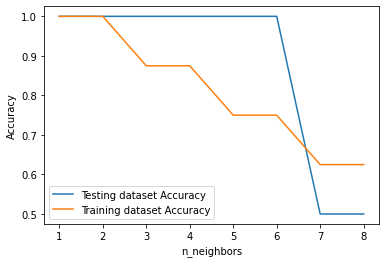

In [7]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [12]:
knn = KNeighborsClassifier(n_neighbors=6)
 
knn.fit(X_train, y_train)
 
# Predict on dataset which model has not seen before
print(knn.predict(X_test))

# Calculate the accuracy of the model
print(knn.score(X_test, y_test)*100, "% accuracy")

['M' 'B']
100.0 % accuracy


In [13]:
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train)
 
# Predict on dataset which model has not seen before
print(knn.predict(X_test))

# Calculate the accuracy of the model
print(knn.score(X_test, y_test)*100, "% accuracy")

['M' 'M']
50.0 % accuracy
